In [62]:
# shortcuts (set accordingly)

# !mkdir ${HOME}/datasets
USER_DIR = "/home/jovyan"
HOME = f"{USER_DIR}/datasets"
DATA_PATH = f"{HOME}/pickleball-frames-1"
YAML_PATH = f"{DATA_PATH}/data.yaml"

In [63]:
%cd ~/datasets

# install dependencies
!pip install ultralytics==8.0.196 opencv-python==4.8.0.74 roboflow --quiet

/home/jovyan/datasets


In [79]:
# Import image display libraries
from IPython.display import display, Image
import ultralytics

# Check Yolo library set-up configs and device detection
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.11.5 torch-2.0.0+cu117 CUDA:0 (NVIDIA A100 80GB PCIe, 81051MiB)
Setup complete ✅ (64 CPUs, 503.4 GB RAM, 225.1/799.6 GB disk)


In [65]:
# Import dataset from Roboflow (Get a free Roboflow API key at https://roboflow.com/)
from roboflow import Roboflow
rf = Roboflow(api_key="<redacted>")
project = rf.workspace("pickleballtombradyreachout").project("pickleball-frames")
version = project.version(1)
dataset = version.download("yolov8")

# Print the dataset info
import os
train_dir = f"{DATA_PATH}/train/images"
valid_dir = f"{DATA_PATH}/valid/images"
test_dir = f"{DATA_PATH}/test/images"

train_count = len([file for file in os.listdir(train_dir) if os.path.isfile(os.path.join(train_dir, file))])
valid_count = len([file for file in os.listdir(valid_dir) if os.path.isfile(os.path.join(valid_dir, file))])
test_count = len([file for file in os.listdir(test_dir) if os.path.isfile(os.path.join(test_dir, file))])

print(f"\nTrain Set: {train_count} Images")
print(f"Valid Set: {valid_count} Images")
print(f"Test Set: {test_count} Images")

loading Roboflow workspace...
loading Roboflow project...

Train Set: 456 Images
Valid Set: 94 Images
Test Set: 93 Images


In [66]:
# Flag to protect train/validation/testing from auto-running
commence = True

# Train model (replace with yolov8x.pt for performance/time comparison)
if commence:
    ! yolo task=detect mode=train model=yolov8s.pt data={YAML_PATH} imgsz=800 epochs=25 plots=True workers=0
else:
    print(f"Model has been trained. Results at {HOME}/runs/detect")

New https://pypi.org/project/ultralytics/8.2.2 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.11.5 torch-2.0.0+cu117 CUDA:0 (NVIDIA A100 80GB PCIe, 81051MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/home/jovyan/datasets/pickleball-frames-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None,

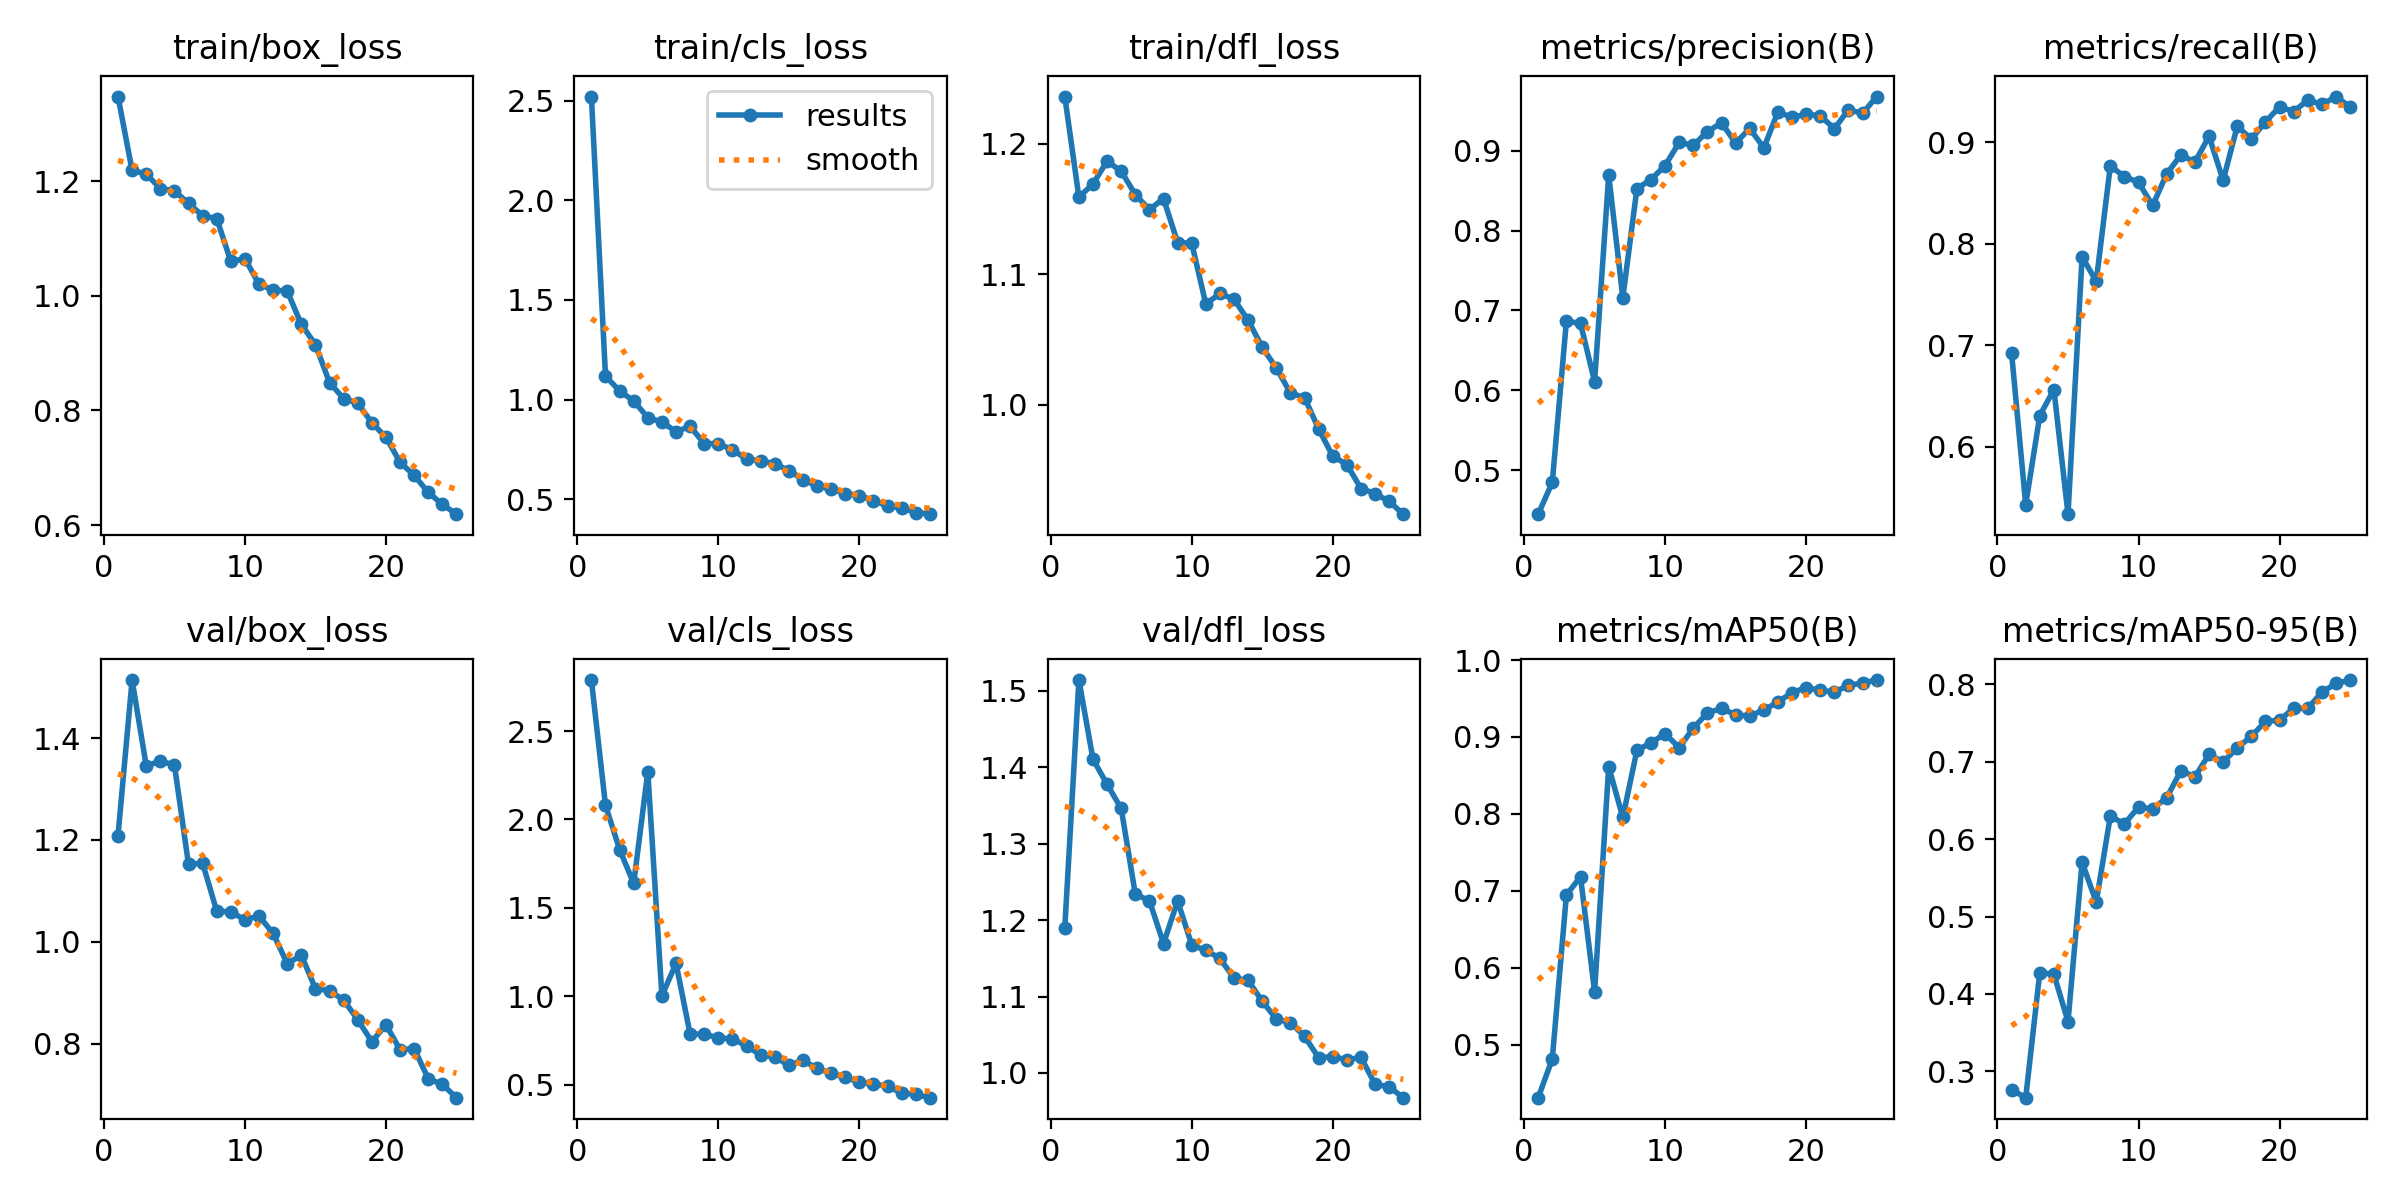

In [80]:
# Model Results (Training)
display(Image(filename=f'{HOME}/runs/detect/train/results.png', width=600))

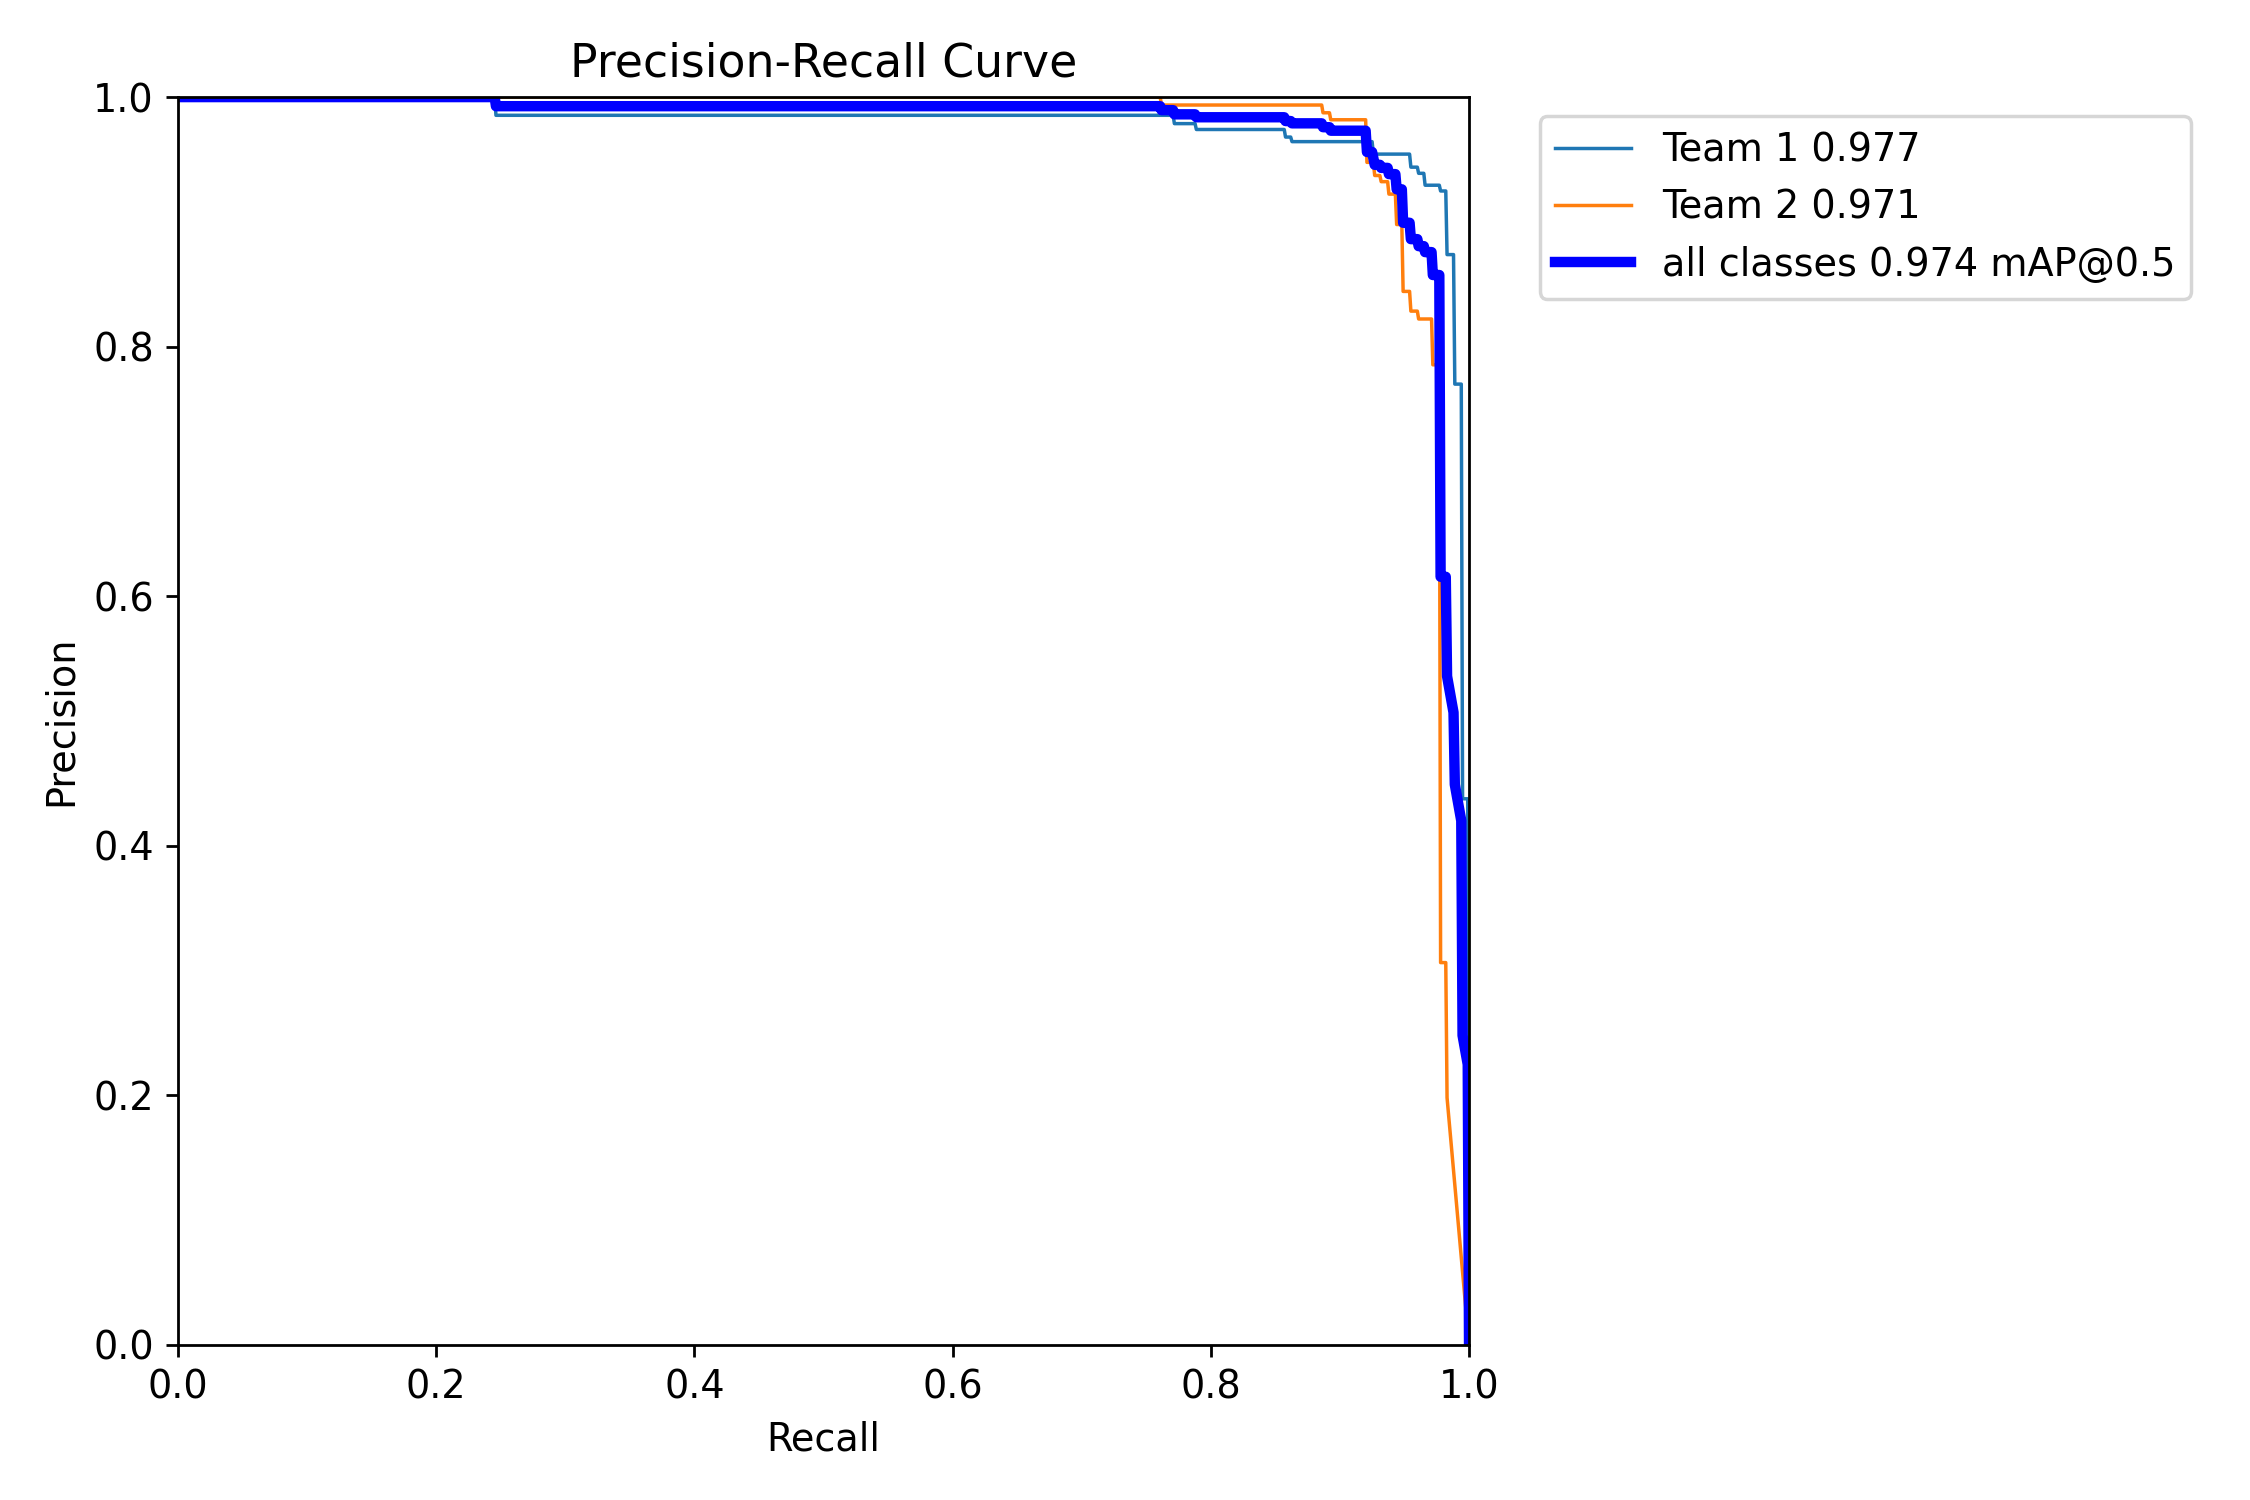

In [81]:
# Precision-Recall Curves (Training)
display(Image(filename=f'{HOME}/runs/detect/train/PR_curve.png', width=600))

In [82]:
# Validate Model
# NOTE: must change "val:" in dataset/pickleball-frames-1/data.yaml to point to validation set

if commence:
    ! yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={YAML_PATH} workers=1 iou=0.5 plots=True
else:
    print(f"Model has been validated at {HOME}/runs/detect")

# Best Confidence: 0.4
# Best IoU: 0.5
    
# clean validation result folders (set path accordingly)
# ! rm -r datasets/runs/detect/val*

Ultralytics YOLOv8.0.196 🚀 Python-3.11.5 torch-2.0.0+cu117 CUDA:0 (NVIDIA A100 80GB PCIe, 81051MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /home/jovyan/datasets/pickleball-frames-1/valid/labels.cache... 94
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 105, len(boxes) = 350. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         94        350       0.95      0.919      0.968      0.788
                Team 1         94        180      0.939      0.933      0.967      0.805
                Team 2         94        170      0.962      0.904      0.969      0.772
Speed: 2.5ms preprocess, 2.3ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/val6
💡 

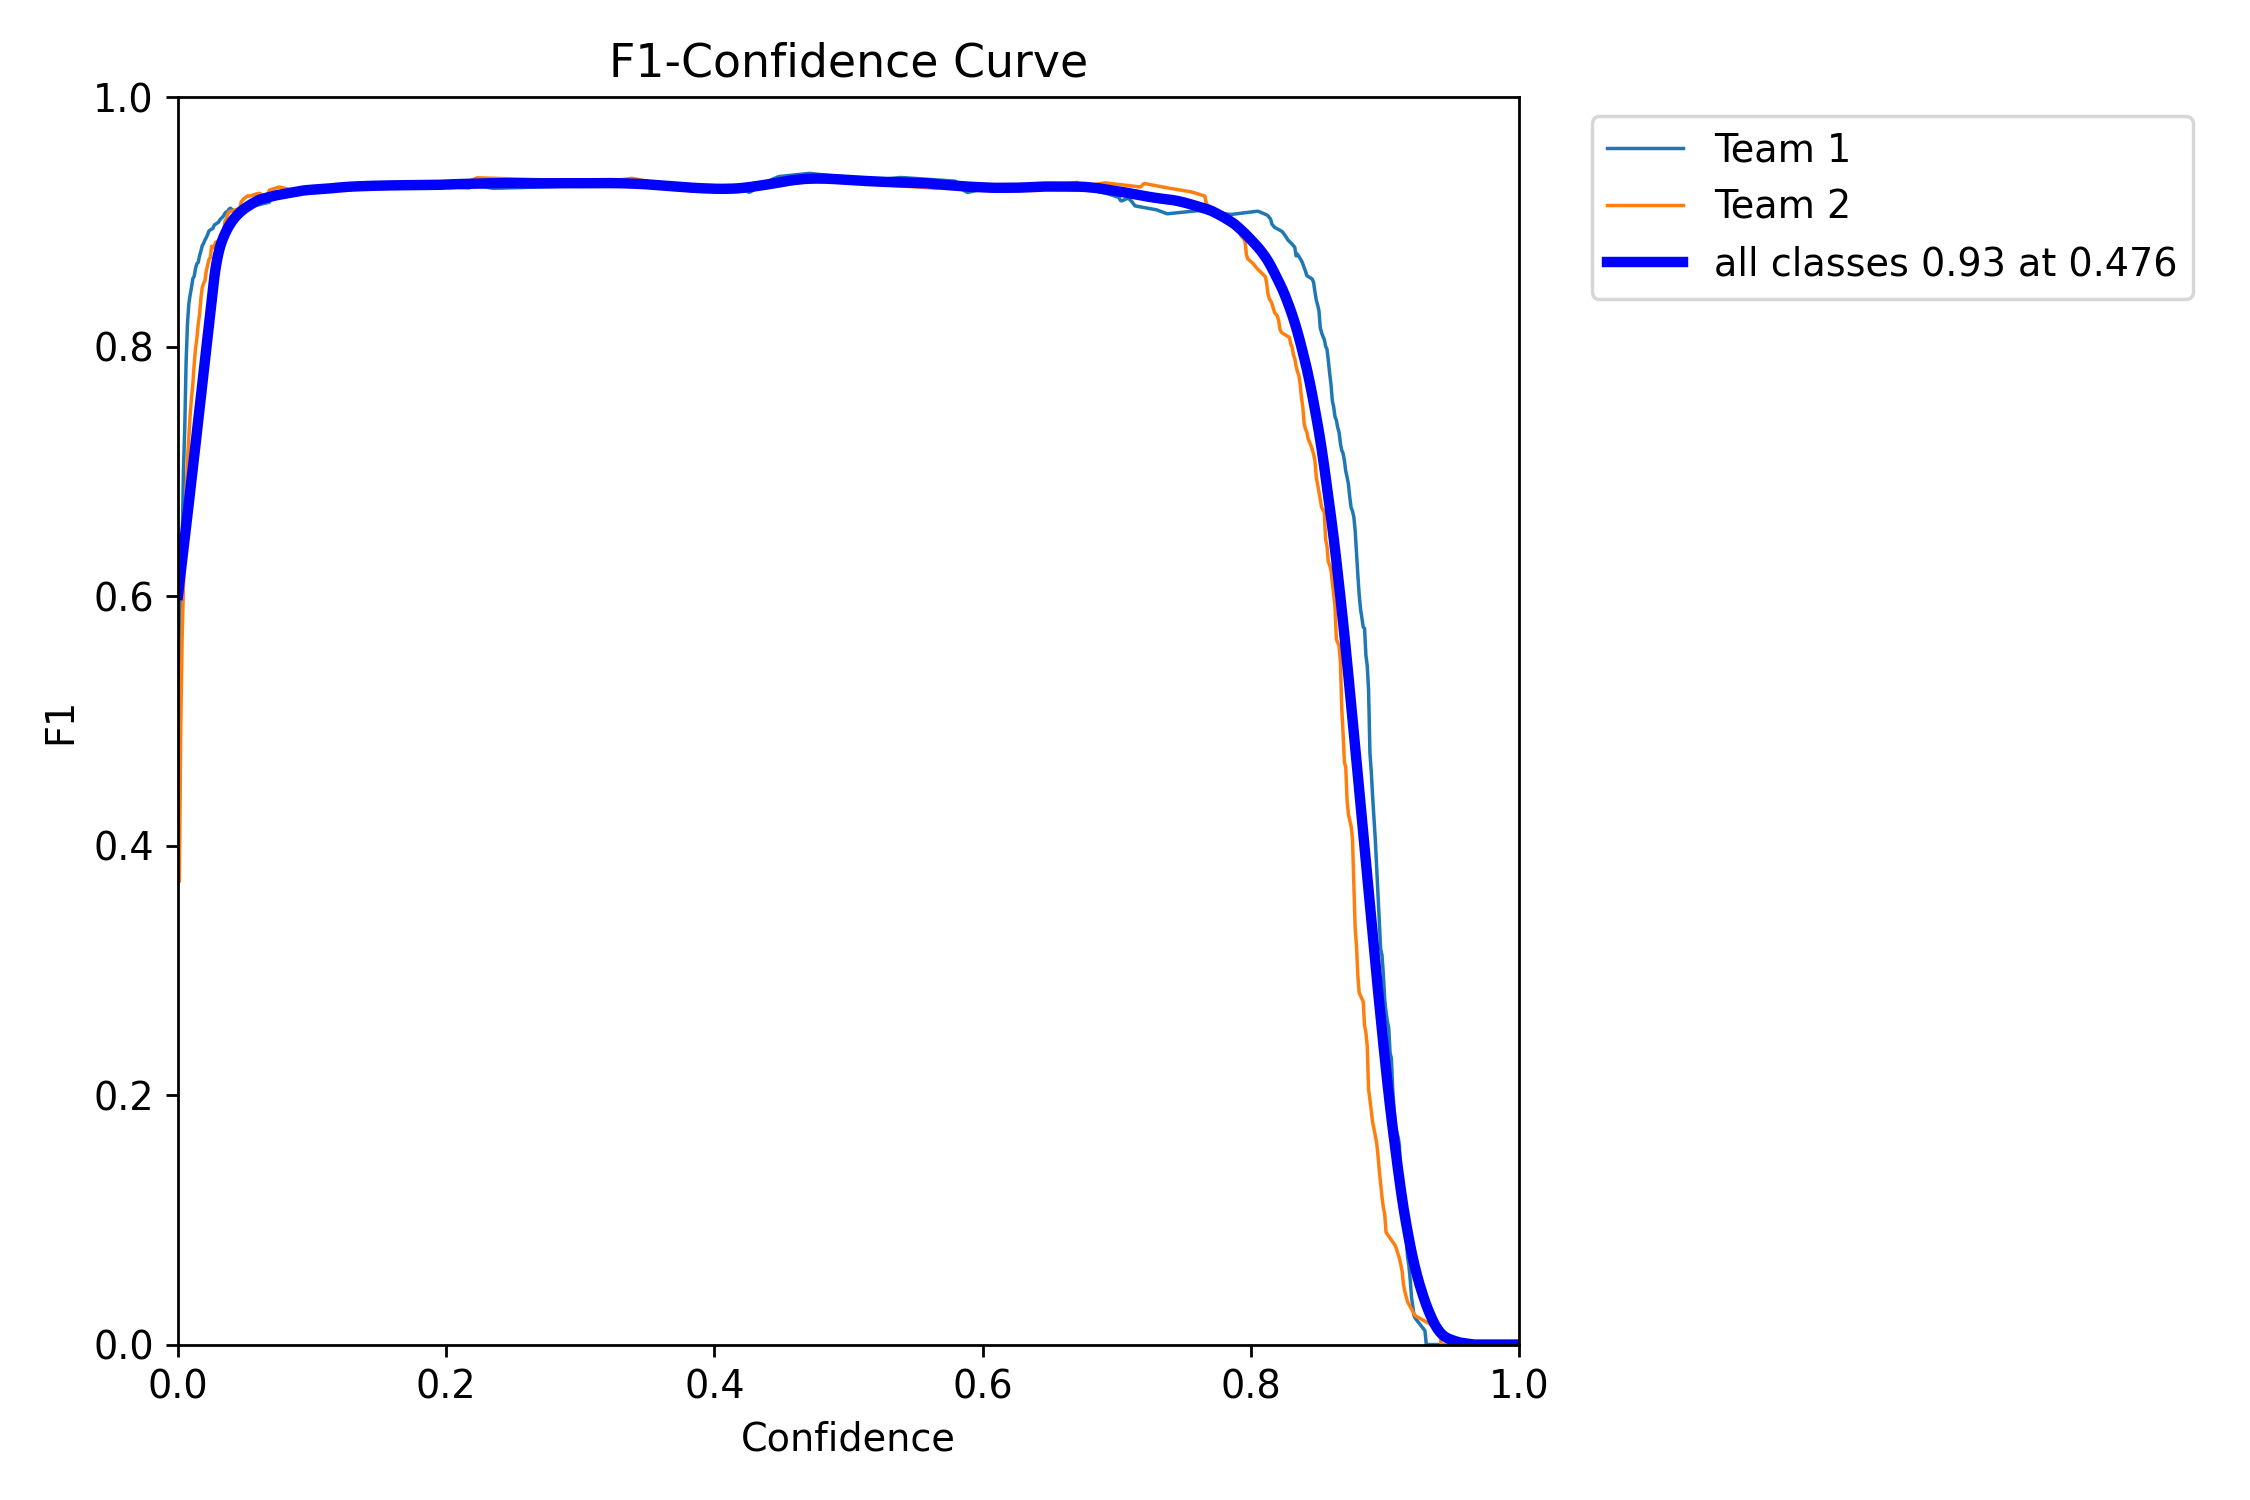

In [83]:
# Show validation F1 curves
display(Image(filename=f'{HOME}/runs/detect/val6/F1_curve.png', width=600))

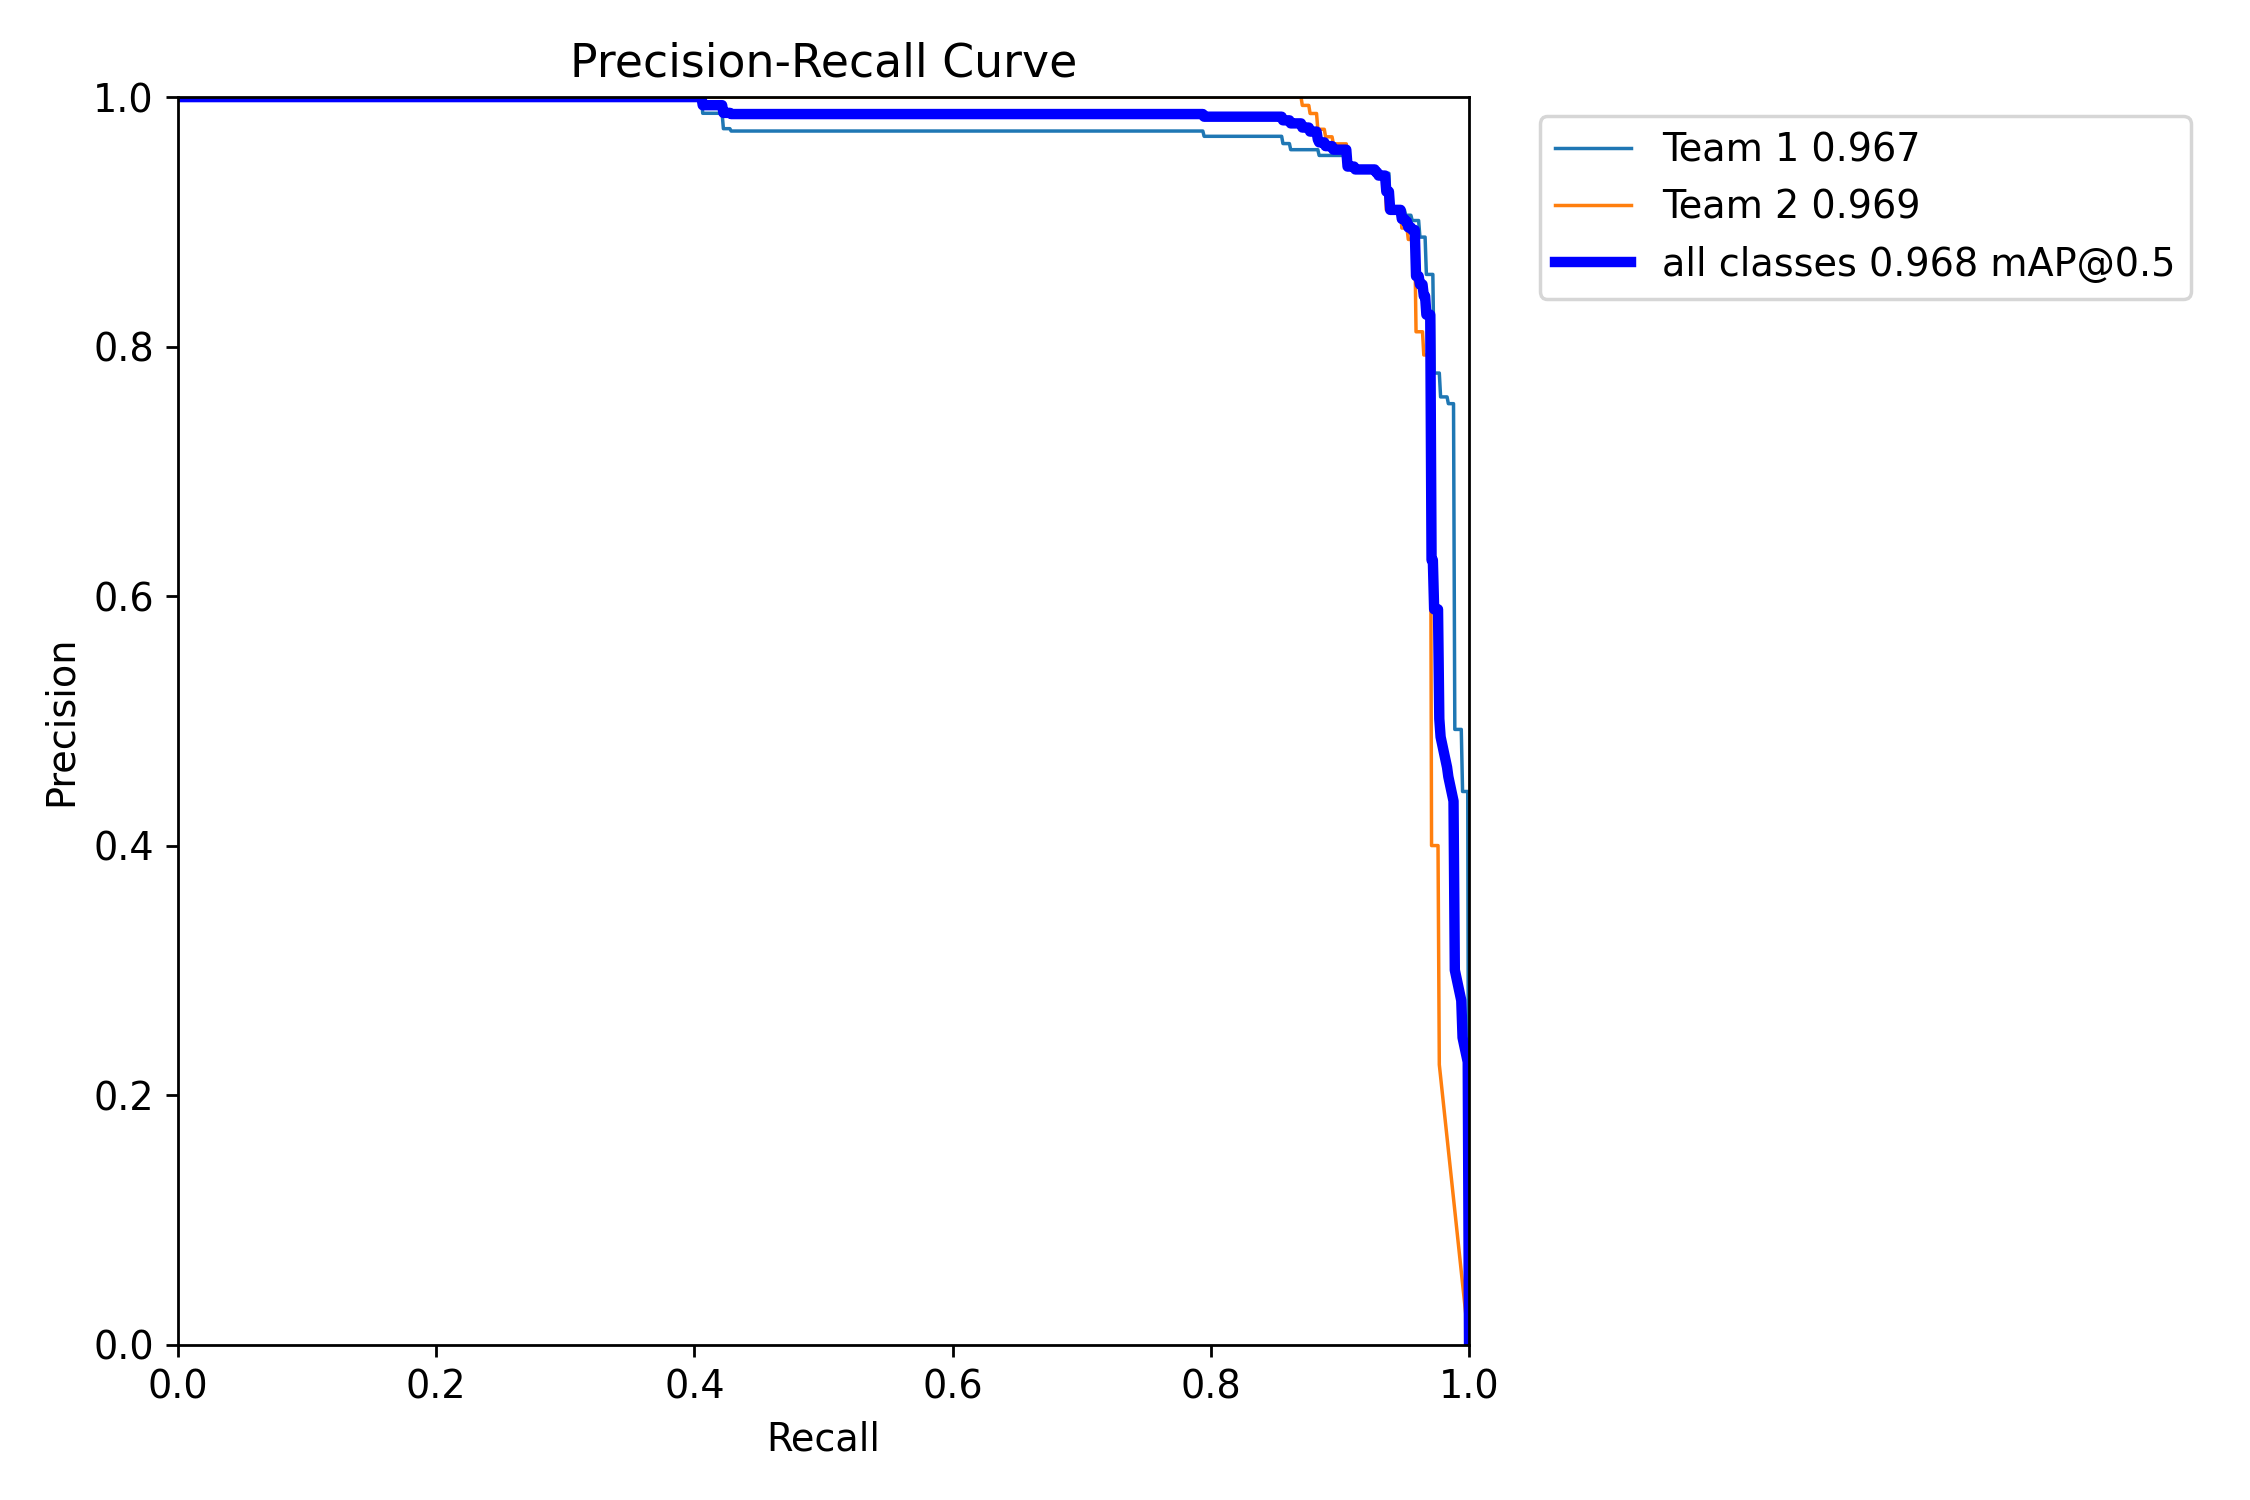

In [84]:
# Show validation mAP curves
display(Image(filename=f'{HOME}/runs/detect/val6/PR_curve.png', width=600))

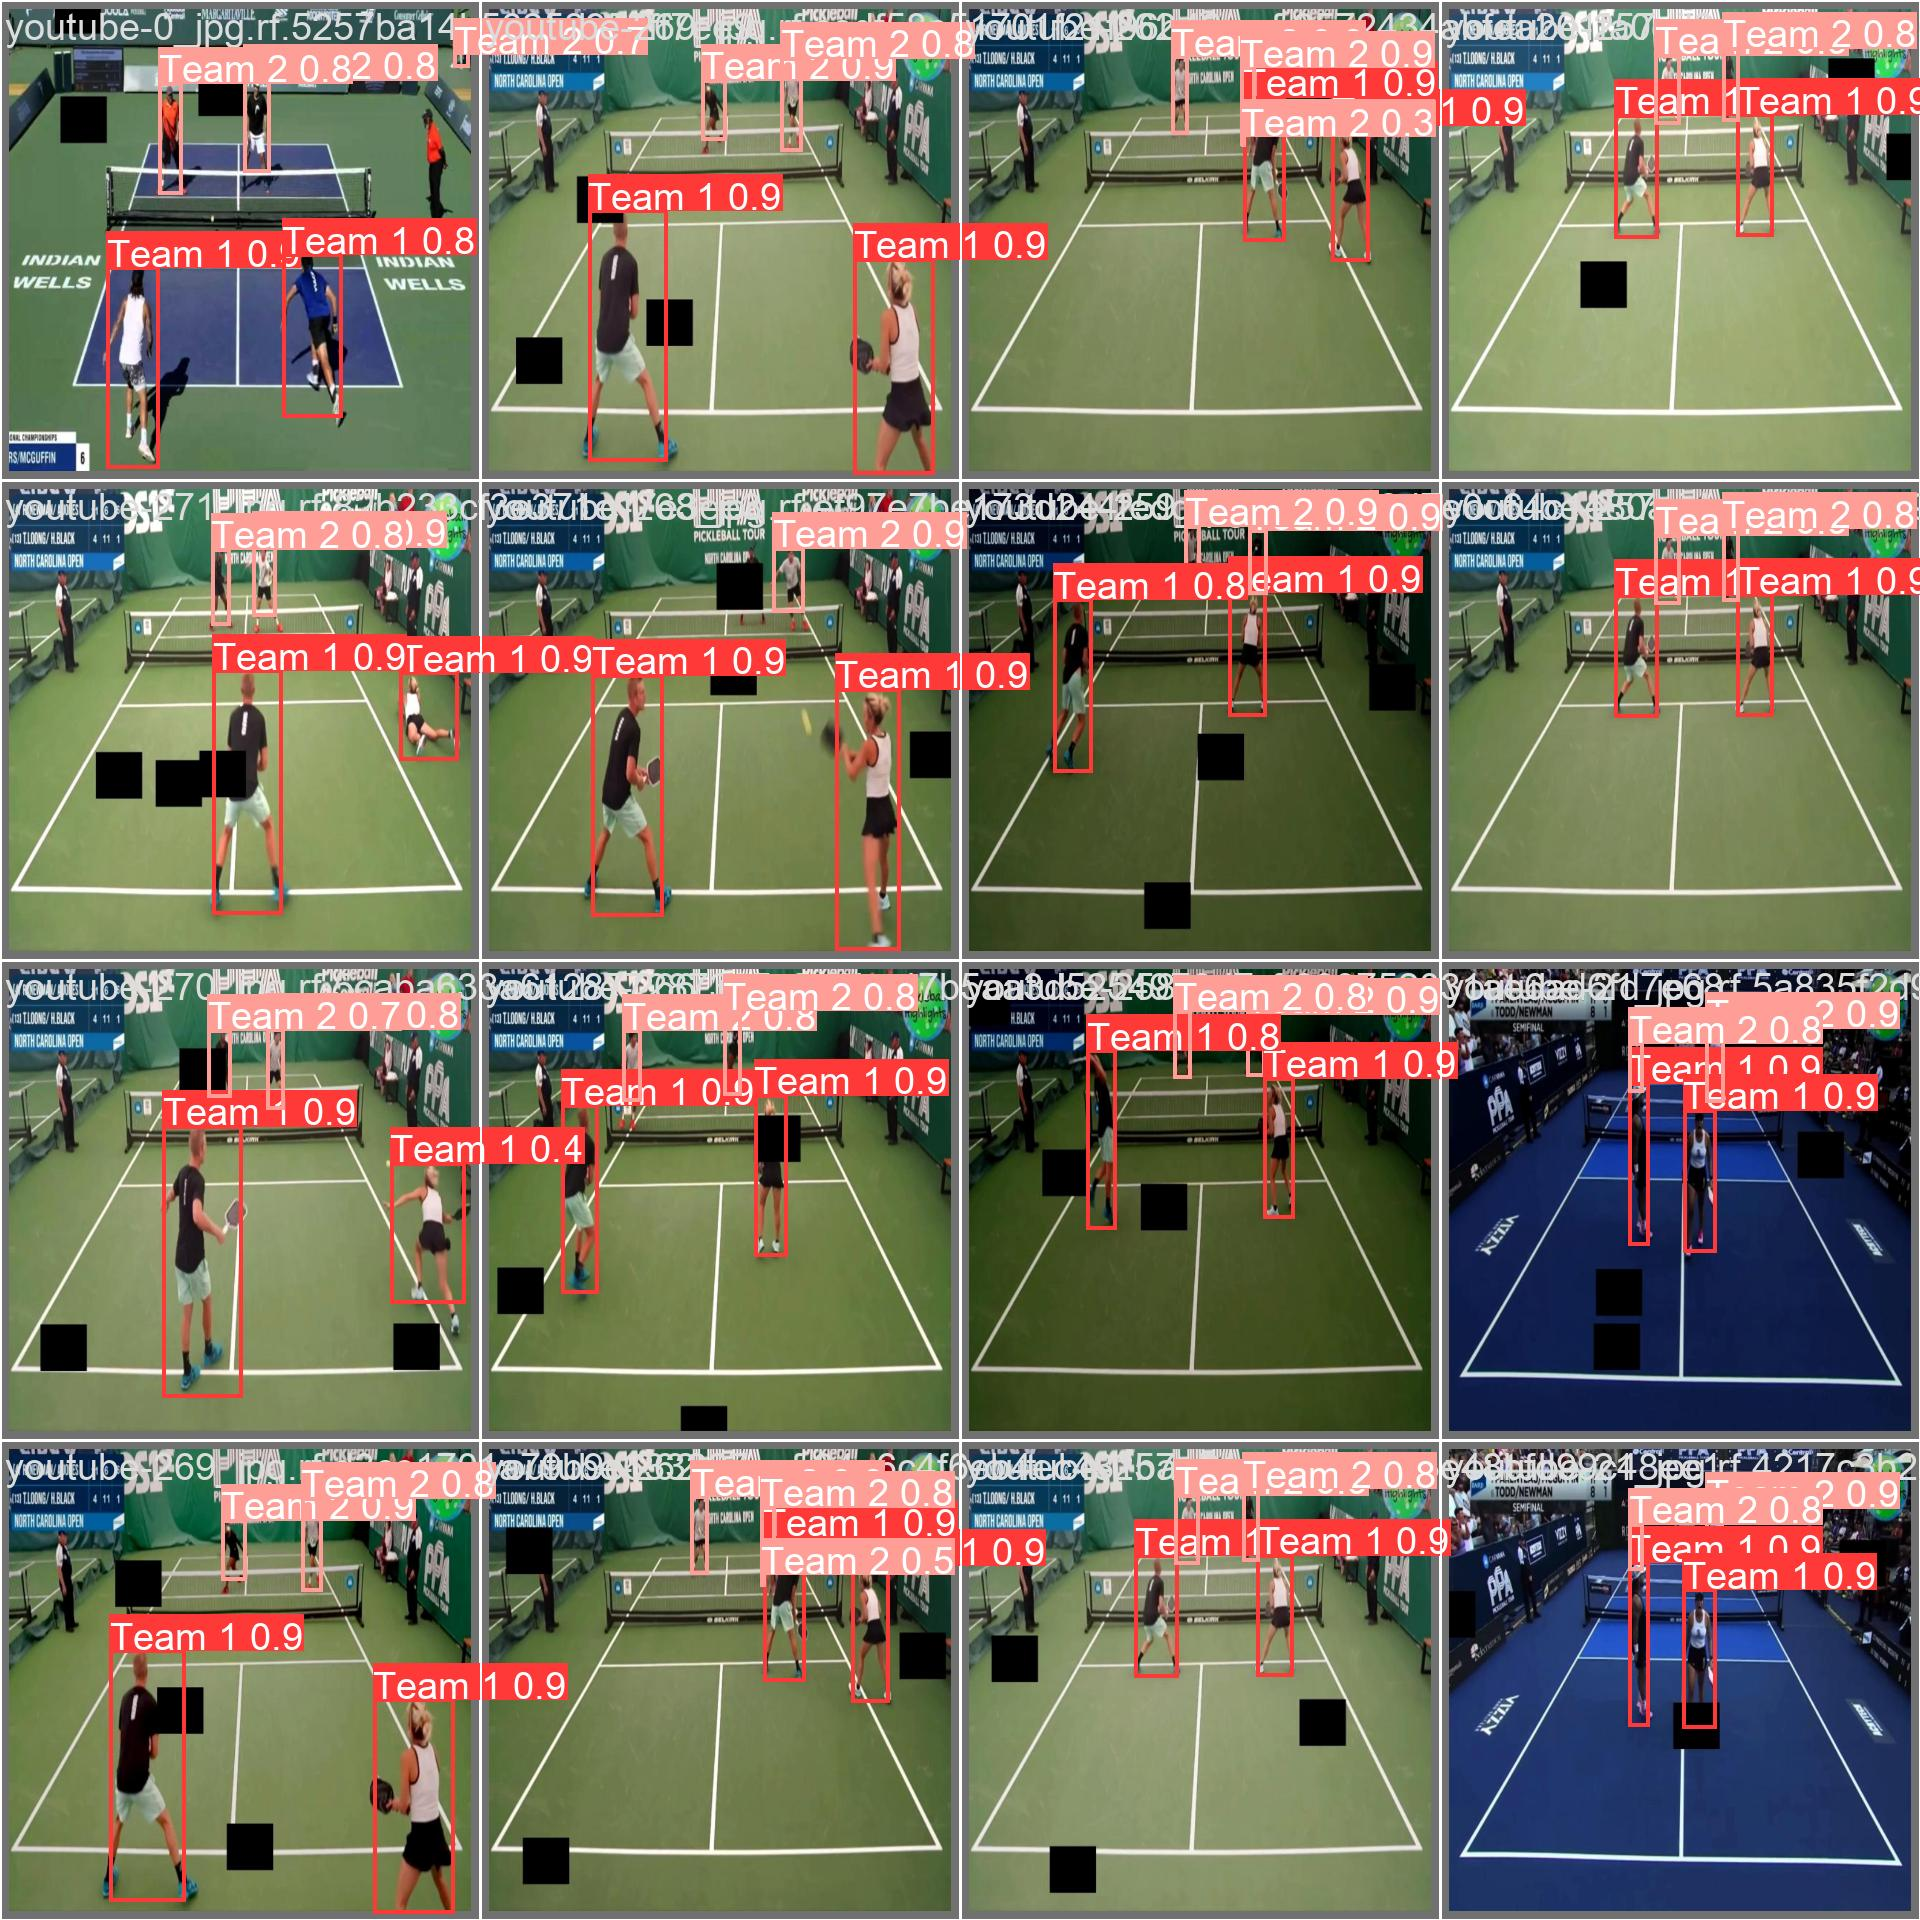

In [85]:
# Examples of detections on the validation batch
display(Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600))

In [87]:
# Testing
# NOTE: must change "val:" in dataset/pickleball-frames-1/data.yaml to point to test set

# path to fine-tuned weights (replace with x-model accordingly)
ft_path = f"{HOME}/runs/detect/train/weights/best.pt"

if commence:
    ! yolo task=detect mode=val model={ft_path} data={YAML_PATH} workers=1 iou=0.5 conf=0.4 plots=True
else:
    print(f"Model has been run on test data. Results at {HOME}/runs/detect")

Ultralytics YOLOv8.0.196 🚀 Python-3.11.5 torch-2.0.0+cu117 CUDA:0 (NVIDIA A100 80GB PCIe, 81051MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /home/jovyan/datasets/pickleball-frames-1/test/labels.cache... 93 
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 94, len(boxes) = 351. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         93        351      0.971      0.935      0.962      0.823
                Team 1         93        175      0.954      0.952      0.967      0.837
                Team 2         93        176      0.988      0.918      0.957       0.81
Speed: 2.4ms preprocess, 2.4ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/val8
💡 L

In [74]:
# Baseline Testing
# NOTE: must change "val:" in dataset/pickleball-frames-1/data.yaml to point to test set

if commence:
    ! yolo task=detect mode=val model=yolov8s.pt data={YAML_PATH} workers=1 plots=True
else:
    print(f"Baseline has been run on test data. Results at {HOME}/runs/detect")

Ultralytics YOLOv8.0.196 🚀 Python-3.11.5 torch-2.0.0+cu117 CUDA:0 (NVIDIA A100 80GB PCIe, 81051MiB)
YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs
val: Scanning /home/jovyan/datasets/pickleball-frames-1/test/labels.cache... 93 
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 94, len(boxes) = 351. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         93        351      0.801      0.359      0.327      0.218
                person         93        175      0.602      0.718      0.651      0.435
               bicycle         93        176          1          0    0.00256    0.00179
Speed: 1.5ms preprocess, 2.1ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/val3
💡

In [75]:
# Inference Testing (Individual Frames)

# if commence:
#     ! yolo task=detect mode=predict model={ft_path} conf=0.4 iou=0.5 source={DATA_PATH}/test/images save=True workers=1 plots=True
# else:
#     print(f"Model has been run on test data. Results at {HOME}/runs/detect")

In [76]:
# Inference Testing (MP4 Input)

from PIL import Image
import cv2

if commence:

    # load model
    model = YOLO(ft_path)
    
    # output mp4 filename
    input_video = f"{USER_DIR}/clipped-input-video.mp4"
    cap = cv2.VideoCapture(input_video)
    
    # get input FPS and dims
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
    # video writer object
    out = cv2.VideoWriter(f'{USER_DIR}/output-video.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))
    
    # Inference frame-by-frame
    while cap.isOpened():

        next, frame = cap.read()
        if not next:
            break
    
        inference = model(frame)
    
        out.write(inference[0].plot())

        if (cv2.waitKey(1) & 0xFF) == ord('q'):
            break
    
    cap.release()
    out.release()
else:
    print(f"Model has produced output video. Results at {USER_DIR}")


0: 480x800 1 Team 1, 5.9ms
Speed: 3.3ms preprocess, 5.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Team 1, 5.0ms
Speed: 2.1ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Team 1, 5.0ms
Speed: 2.0ms preprocess, 5.0ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Team 1, 5.0ms
Speed: 2.2ms preprocess, 5.0ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 Team 1s, 5.0ms
Speed: 2.1ms preprocess, 5.0ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 Team 1s, 5.0ms
Speed: 2.1ms preprocess, 5.0ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Team 1, 4.9ms
Speed: 2.1ms preprocess, 4.9ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 Team 1s, 5.0ms
Speed: 2.1ms preprocess, 5.0ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 800)

0: 4